# Context

In the framework of the "Greening the City" program organized by the City of Paris, we are conducting an exploratory data analysis on OpenData about trees managed by the City of Paris. The goal is to assist Paris in becoming a "Smart City" by managing its trees as responsibly as possible. That is, by optimizing the routes necessary for the maintenance of these trees. This entails a thorough assessment of the dataset's quality, focusing on the accuracy and consistency of the information provided. Our analysis aims to uncover any discrepancies, missing data, or inconsistencies that could hinder effective tree management strategies. By identifying these areas for improvement, we aim to enhance the overall coherence of the data, ensuring that the individuals responsible for the upkeep of Paris's urban forestry have access to reliable and actionable insights. This will empower them to make informed decisions regarding the care and maintenance of the city’s green spaces, contributing to the sustainability and beautification of Paris.

## Tools used

- Python # Programming language
- Jupyter Notebook # Web-based interactive computing notebook
- Pandas # Data manipulation library
- Matplotlib # Data visualization library
- Seaborn # Data visualization library
- See README.md for setup instructions and general information


# Step 1: Perform a Naive Analysis of the Dataset (before cleaning)

In [64]:
import pandas as pd # Import the pandas library used to manipulate the data


## load the dataset

In [65]:
# Relative path to the CSV file from with the data
file_path = '../data/P2-arbres-fr.csv' 

# Load the data of the csv file into a DataFrame with a separator ;
df = pd.read_csv(file_path, sep=';') 

## Display the number of rows and columns to get a general overview of the dataset

In [66]:
print(f'The dataset contains {df.shape[0]} rows (instances) and {df.shape[1]} columns (variables).') 

The dataset contains 200137 rows (instances) and 18 columns (variables).


## Get general information on columns, data types, etc.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

## Glossary of Data Types

### The data contains several columns relevant to our analysis of trees in Paris, including:

- `IDBASE`: Unique identifier of the tree.
- `TYPE EMPLACEMENT`: Type of location (Tree).
- `DOMANIALITE`: Type of domain (Garden, Alignment, Cemetery, etc.).
- `ARRONDISSEMENT`: Location by district or by woods (e.g., Bois de Boulogne).
- `COMPLEMENT ADRESSE, NUMERO, LIEU / ADRESSE`: Address details.
- `IDEMPLACEMENT`: Identifier of the location.
- `LIBELLE FRANCAIS, GENRE, ESPECE, VARIETE OUCULTIVAR`: Botanical details of the tree.
- `CIRCONFERENCE (cm)`: Circumference of the tree in cm.
- `HAUTEUR (m)`: Height of the tree in meters.
- `STADE DE DEVELOPPEMENT`: Indicates the stage of development of the tree (Young, Mature, etc.).
- `REMARQUABLE`: Whether the tree is classified as remarkable.
- `geo_point_2d`: Geographical coordinates.

### The data types in the dataset can be classified into two main categories: quantitative and qualitative.

In [68]:
df.dtypes.value_counts() # Count the number of columns with each data type

object     11
float64     4
int64       3
Name: count, dtype: int64

## Observations:

    7 quantitative variables
    11 qualitative (categorical) variables

## Display the first few rows of the DataFrame for an initial overview of the data

In [69]:
# Display the first few rows of the DataFrame for an initial overview of the data
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


# Step 2: Conduct a Detailed Univariate Analysis of Each Variable in the Dataset

## a - Statistical Indicators for Quantitative Variables

In [70]:
df.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


## Glossary of Statistical Terms

- **Count**: The number of non-null entries in the dataset.
- **Mean**: The average value of the dataset.
- **Std**: Short for "standard deviation," a measure of the amount of variation or dispersion in a set of values.
- **Min**: The smallest value in the dataset.
- **25%**: The 25th percentile, or first quartile, indicating that 25% of the data falls below this value.
- **50%**: The 50th percentile, or median, the middle value of the dataset.
- **75%**: The 75th percentile, or third quartile, indicating that 75% of the data falls below this value.
- **Max**: The largest value in the dataset.


## Observations:
- 'id': identifier, unique values
- 'numero': only missing values
- 'circonference_cm': very high standard deviation, presence of outliers
- 'hauteur_m': very high standard deviation, presence of outliers
- 'remarquable': only 2 possible values (0 or 1) -> categorical variable
- 'geo_point_2d_a': very low standard deviation, no outliers
- 'geo_point_2d_b': very low standard deviation, no outliers


## b- Statistical Indicators for Qualitative Variables

In [71]:
var_qualitatives = df.select_dtypes(include='object').columns # Select qualitative variables

### List of Modalities


In [72]:
for var in var_qualitatives:
    print(f'{var}: {df[var].unique()}\n')

type_emplacement: ['Arbre']

domanialite: ['Jardin' 'Alignement' 'DJS' 'DFPE' 'CIMETIERE' 'DASCO' 'DAC'
 'PERIPHERIQUE' 'DASES' nan]

arrondissement: ['PARIS 7E ARRDT' 'PARIS 17E ARRDT' 'PARIS 16E ARRDT' 'PARIS 4E ARRDT'
 'PARIS 13E ARRDT' 'PARIS 12E ARRDT' 'PARIS 19E ARRDT' 'PARIS 14E ARRDT'
 'PARIS 15E ARRDT' 'PARIS 3E ARRDT' 'PARIS 20E ARRDT' 'PARIS 18E ARRDT'
 'PARIS 6E ARRDT' 'PARIS 11E ARRDT' 'PARIS 1ER ARRDT' 'PARIS 2E ARRDT'
 'PARIS 5E ARRDT' 'VAL-DE-MARNE' 'SEINE-SAINT-DENIS' 'HAUTS-DE-SEINE'
 'PARIS 9E ARRDT' 'PARIS 10E ARRDT' 'PARIS 8E ARRDT' 'BOIS DE BOULOGNE'
 'BOIS DE VINCENNES']

complement_addresse: [nan 'c 12' '12-36' ... 'au n.14' 'F2bis' '40face']

lieu: ['MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E'
 'PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING'
 'SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE LA PORTE MAILLOT' ...
 'TERRAIN D EDUCATION PHYSIQUE / 49 RUE OLIVIER METRA' 'RUE EDOUARD QUENU'
 'RUE DU GENERAL NIESSEL']

id_emplacement: ['19' '20' '21' ... '720170153' '720170

### Number of Modalities

In [73]:
for var in var_qualitatives:
    print(f'{var}: {df[var].nunique()}')

type_emplacement: 1
domanialite: 9
arrondissement: 25
complement_addresse: 3795
lieu: 6921
id_emplacement: 69040
libelle_francais: 192
genre: 175
espece: 539
variete: 436
stade_developpement: 4


## Observations:
- The first six variables are related to the location of the trees.
- The last five variables are related to the variety of trees and their stage of development.
- 'type_emplacement': constant value (Tree)
- 'id_emplacement': very high cardinality => contains a large number of unique values, might be a unique identifier for each tree


## Number of trees for each modality with a sum

In [74]:
for var in var_qualitatives: # Loop through each qualitative variable
    print(df[var].value_counts(), '\n') # Display the number of trees for each modality
    print(df[var].value_counts().sum(), '\n') # Display the sum of the number of trees for each modality

type_emplacement
Arbre    200137
Name: count, dtype: int64 

200137 

domanialite
Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: count, dtype: int64 

200136 

arrondissement
PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10011
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1764
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E AR

# Step 3 : Data Analysis and Data Cleaning (Double, Outliers, etc... in the Dataset)


## Double entry of the same tree

In [75]:
df.duplicated() # Check for duplicate entries, false means no duplicates for each row

0         False
1         False
2         False
3         False
4         False
          ...  
200132    False
200133    False
200134    False
200135    False
200136    False
Length: 200137, dtype: bool

In [76]:
df.duplicated(subset='id').sum() # Number of duplicate entries,analysis based on the 'id' column

0

In [77]:
print(df.shape) # Display the number of rows and columns in the DataFrame
df.drop_duplicates(subset='id', inplace=True) # Remove duplicate entries, subset is used to specify the column to check for duplicates and inplace=True is used to modify the DataFrame if necessary
print(df.shape) # Display after removing duplicates with the 'id' column

(200137, 18)
(200137, 18)


## Observations:
- There are no duplicate entries in the dataset.
- The 'id' column is unique for each tree.
- The 'numero' column contains missing values.
- the 'type_emplacement' column contains a constant value (Tree).
- the 'complement_addresse' column contains missing values and cardinality is high.
- the 'id_emplacement' is not worth keeping.

## Erase columns unnecessary for the analysis

In [78]:
df.drop(columns=['id', 'numero', 'type_emplacement', 'id_emplacement'], inplace=True) # Drop unnecessary columns

In [79]:
df.head() # Display the first few rows of the DataFrame

,domanialite,arrondissement,complement_addresse,lieu,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [80]:
df.info() # Display general information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          200136 non-null  object 
 1   arrondissement       200137 non-null  object 
 2   complement_addresse  30902 non-null   object 
 3   lieu                 200137 non-null  object 
 4   libelle_francais     198640 non-null  object 
 5   genre                200121 non-null  object 
 6   espece               198385 non-null  object 
 7   variete              36777 non-null   object 
 8   circonference_cm     200137 non-null  int64  
 9   hauteur_m            200137 non-null  int64  
 10  stade_developpement  132932 non-null  object 
 11  remarquable          137039 non-null  float64
 12  geo_point_2d_a       200137 non-null  float64
 13  geo_point_2d_b       200137 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 21.4+ MB


## Missing Values Analysis

In [81]:
df.isna() # Check for missing values, false means no missing values for each row

,domanialite,arrondissement,complement_addresse,lieu,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,False,False,True,False,False,False,False,True,False,False,True,False,False,False
1,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,False,False,True,False,False,False,False,True,False,False,False,True,False,False
3,False,False,True,False,False,False,False,True,False,False,False,True,False,False
4,False,False,True,False,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,False,False,True,False,True,False,False,True,False,False,True,False,False,False
200133,False,False,True,False,False,False,False,True,False,False,True,False,False,False
200134,False,False,True,False,False,False,False,True,False,False,True,False,False,False
200135,False,False,True,False,False,False,False,True,False,False,True,False,False,False


In [82]:
df.isna().sum().sort_values(ascending=False) # Count the number of missing values for each column

complement_addresse    169235
variete                163360
stade_developpement     67205
remarquable             63098
espece                   1752
libelle_francais         1497
genre                      16
domanialite                 1
arrondissement              0
lieu                        0
circonference_cm            0
hauteur_m                   0
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [83]:
percentage_Nan = (df.isna().sum() / df.shape[0]).sort_values(ascending=False)*100 # Calculate the percentage of missing values for each column
percentage_Nan # Display the percentage of missing values for each column

complement_addresse    84.559577
variete                81.624088
stade_developpement    33.579498
remarquable            31.527404
espece                  0.875400
libelle_francais        0.747988
genre                   0.007995
domanialite             0.000500
arrondissement          0.000000
lieu                    0.000000
circonference_cm        0.000000
hauteur_m               0.000000
geo_point_2d_a          0.000000
geo_point_2d_b          0.000000
dtype: float64

## Graphical Representation of Missing Values

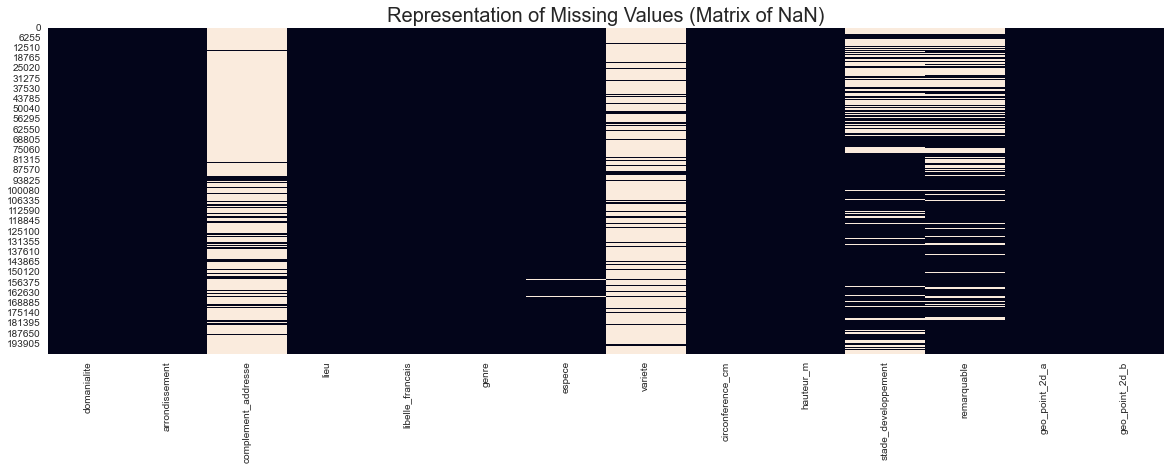

In [84]:
import matplotlib.pyplot as plt # Import the matplotlib library for data visualization
import seaborn as sns # Import the seaborn library for data visualization
sns.set_style('whitegrid') # Set the style of the plots
plt.figure(figsize=(20, 6)) # Set the size of the figure
plt.title('Representation of Missing Values (Matrix of NaN)', fontsize=20) # Set the title of the figure
sns.heatmap(df.isna(), cbar=False) # Create a heatmap of missing values
plt.show() # Display the figure so that it is visible in the notebook.

## Erase columns with less than 50% missing values

In [85]:
df.drop(columns=percentage_Nan[percentage_Nan > 50].index, inplace=True) # Drop columns with more than 50% missing values

In [86]:
df.shape # Display the number of rows and columns in the DataFrame

(200137, 12)

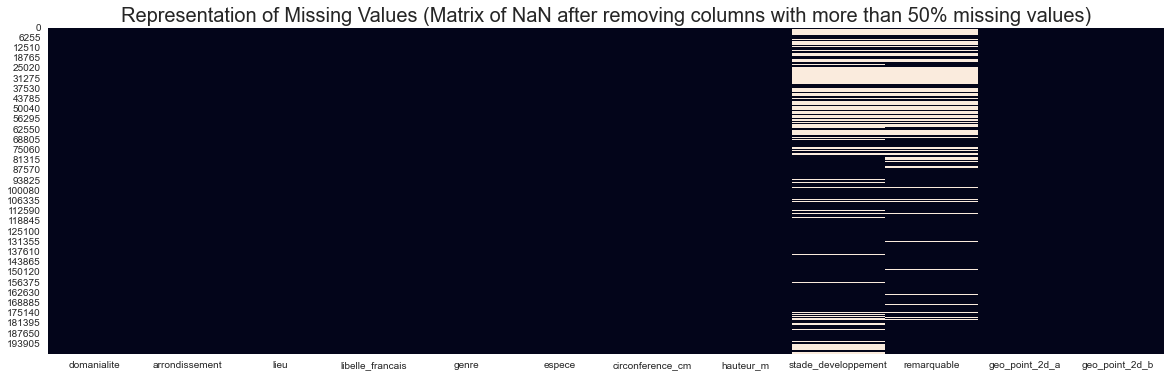

In [87]:
sns.set_style('whitegrid') # Set the style of the plots
plt.figure(figsize=(20, 6)) # Set the size of the figure
plt.title('Representation of Missing Values (Matrix of NaN after removing columns with more than 50% missing values)', fontsize=20) # Set the title of the figure
sns.heatmap(df.isna(), cbar=False) # Create a heatmap of missing values after removing columns with more than 50% missing values
plt.show() # Display the figure so that it is visible in the notebook and the missing values are visible.

## Outlier Treatment


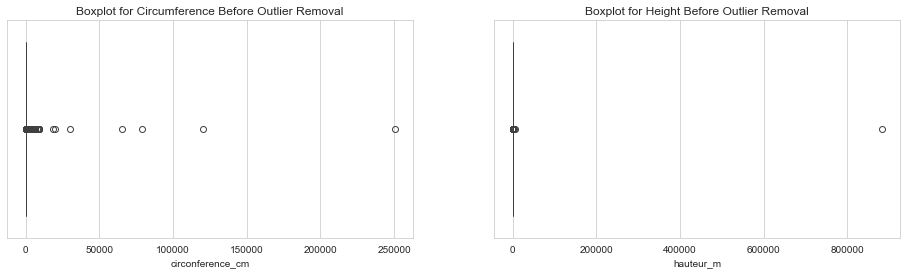

In [88]:
# Set the size of the entire figure
plt.figure(figsize=(16, 4))

# Create the first subplot for the circumference
plt.subplot(1, 2, 1) # (rows, columns, subplot index)
sns.boxplot(x='circonference_cm',data=df)
plt.title("Boxplot for Circumference Before Outlier Removal")

# Create the second subplot for the height
plt.subplot(1, 2, 2) # (rows, columns, subplot index)
sns.boxplot(x='hauteur_m', data=df)
plt.title("Boxplot for Height Before Outlier Removal")

plt.show()

## Understanding Boxplots

A boxplot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

### Components of a Boxplot

- **Central Box**: The central box of the boxplot represents the interquartile range (IQR), which is the distance between the first and third quartiles. The bottom and top edges of the box indicate the Q1 and Q3, respectively. The line inside the box shows the median of the data.

- **Whiskers**: The lines extending from the top and bottom of the box, known as whiskers, indicate variability outside the upper and lower quartiles. They extend to the last data point that is within 1.5 times the IQR.

- **Outliers**: Points outside the range of the whiskers are considered outliers and are represented as individual points. These are the data points that fall beyond the end of the whiskers and can indicate anomalies in the data set.

### What Boxplots Reveal

- **Outliers**: By identifying outliers, boxplots allow analysts to detect and examine anomalous observations that may need further investigation.

- **Data Distribution**: Boxplots provide a visual summary of the central tendency, dispersion, and skewness of the data distribution.

- **Comparisons**: When used side by side, boxplots can quickly compare distributions across different categories or groups.

Boxplots are especially useful in exploratory data analysis and are well-suited for both data scientists and individuals new to data science due to their simplicity and richness of information.


## Removing Outliers

### Circumference

In [89]:
## statistics for circumference before removal of outliers
df['circonference_cm'].describe()

count    200137.000000
mean         83.380479
std         673.190213
min           0.000000
25%          30.000000
50%          70.000000
75%         115.000000
max      250255.000000
Name: circonference_cm, dtype: float64

In [90]:
### Detect if distrubution is normal
from scipy.stats import normaltest
stat, p = normaltest(df['circonference_cm']) # Perform the normality test
alpha = 0.05 # Set the significance level
print("Test statistic:", stat) # Display the test statistic
print("P-value:", p) # Display the p-value
if p < alpha: # Check if the p-value is less than the significance level
    print("The null hypothesis can be rejected: the distribution is not normal.")
else:
    print("The null hypothesis cannot be rejected: the distribution is normal.")

Test statistic: 1094177.3393356279
P-value: 0.0
The null hypothesis can be rejected: the distribution is not normal.


### Using the IQR method to remove outliers for circumference because the distribution is not normal

In [91]:
# remove outliers for circumference
Q1 = df['circonference_cm'].quantile(0.25) # Calculate the first quartile (Q1)
Q3 = df['circonference_cm'].quantile(0.75) # Calculate the third quartile (Q3)
IQR = Q3 - Q1 # Calculate the interquartile range (IQR)


In [92]:
# Calculate the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
print(f'Lower bound for outliers: {lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'Upper bound for outliers: {upper_bound}')

Lower bound for outliers: -97.5
Upper bound for outliers: 242.5


In [93]:
# Remove outliers for circumference
df = df[(df['circonference_cm'] >= lower_bound) & (df['circonference_cm'] <= upper_bound)]

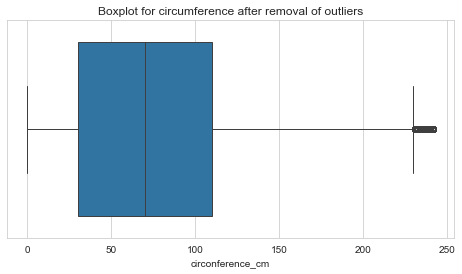

In [94]:
plt.figure(figsize=(8,4))
sns.boxplot(x='circonference_cm', data=df)
plt.title("Boxplot for circumference after removal of outliers")
plt.show()

In [95]:
## statistics for circumference after removal of outliers
df['circonference_cm'].describe()

count    196728.000000
mean         76.053241
std          56.588084
min           0.000000
25%          30.000000
50%          70.000000
75%         110.000000
max         242.000000
Name: circonference_cm, dtype: float64

### Height

In [96]:
## statistics for height before removal of outliers
df['hauteur_m'].describe()

count    196728.000000
mean         12.988781
std        1988.221864
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: hauteur_m, dtype: float64

In [97]:
### Detect if distribution is normal
stat, p = normaltest(df['hauteur_m']) # Perform the normality test
alpha = 0.05 # Set the significance level
print("Test statistic:", stat) # Display the test statistic
print("P-value:", p) # Display the p-value
if p < alpha: # Check if the p-value is less than the significance level
    print("The null hypothesis can be rejected: the distribution is not normal.")
else:
    print("The null hypothesis cannot be rejected: the distribution is normal.")

Test statistic: 1194642.0272159306
P-value: 0.0
The null hypothesis can be rejected: the distribution is not normal.


### Using the IQR method to remove outliers for height because the distribution is not normal

In [98]:
# remove outliers for height
Q1 = df['hauteur_m'].quantile(0.25) # Calculate the first quartile (Q1)
Q3 = df['hauteur_m'].quantile(0.75) # Calculate the third quartile (Q3)
IQR = Q3 - Q1 # Calculate the interquartile range (IQR)

In [99]:
# Calculate the lower and upper bounds for the outliers with lower bound that cant be negative
lower_bound = Q1 - 1.5 * IQR
if lower_bound < 0:
    lower_bound = 0
print(f'Lower bound for outliers: {lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'Upper bound for outliers: {upper_bound}')

Lower bound for outliers: 0
Upper bound for outliers: 22.5


In [100]:
# Remove outliers for height
df = df[(df['hauteur_m'] >= lower_bound) & (df['hauteur_m'] <= upper_bound)]

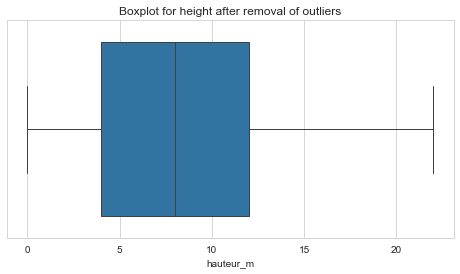

In [101]:
plt.figure(figsize=(8,4))
sns.boxplot(x='hauteur_m', data=df)
plt.title("Boxplot for height after removal of outliers")
plt.show()

In [102]:
## statistics for height after removal of outliers
df['hauteur_m'].describe()

count    193997.000000
mean          7.925339
std           5.704763
min           0.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          22.000000
Name: hauteur_m, dtype: float64

## Treatment of categorical variables

## Identify categorical variable that can be converted to numerical

In [103]:
df.dtypes.value_counts() # Count the number of columns with each data type

object     7
float64    3
int64      2
Name: count, dtype: int64

In [104]:
df.info() # Display general information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 193997 entries, 0 to 200136
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          193996 non-null  object 
 1   arrondissement       193997 non-null  object 
 2   lieu                 193997 non-null  object 
 3   libelle_francais     192518 non-null  object 
 4   genre                193981 non-null  object 
 5   espece               192247 non-null  object 
 6   circonference_cm     193997 non-null  int64  
 7   hauteur_m            193997 non-null  int64  
 8   stade_developpement  127761 non-null  object 
 9   remarquable          132163 non-null  float64
 10  geo_point_2d_a       193997 non-null  float64
 11  geo_point_2d_b       193997 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.2+ MB


In [105]:
## List of categorical variables
var_qualitatives = df.select_dtypes(include='object').columns
var_qualitatives

Index(['domanialite', 'arrondissement', 'lieu', 'libelle_francais', 'genre',
       'espece', 'stade_developpement'],
      dtype='object')

In [106]:
## Change the type of the 'remarquable' column to a categorical variable like 'category' and also those which Dtype is object
df['remarquable'] = df['remarquable'].astype('category') # remarquable is categorical variable
for var in var_qualitatives: # Loop through each qualitative variable
    df[var] = df[var].astype('category')
df.info() # Display general information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 193997 entries, 0 to 200136
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   domanialite          193996 non-null  category
 1   arrondissement       193997 non-null  category
 2   lieu                 193997 non-null  category
 3   libelle_francais     192518 non-null  category
 4   genre                193981 non-null  category
 5   espece               192247 non-null  category
 6   circonference_cm     193997 non-null  int64   
 7   hauteur_m            193997 non-null  int64   
 8   stade_developpement  127761 non-null  category
 9   remarquable          132163 non-null  category
 10  geo_point_2d_a       193997 non-null  float64 
 11  geo_point_2d_b       193997 non-null  float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 10.0 MB


## Copy of the cleaned dataset

In [107]:
df_cleaned = df.copy(deep = True) # Create a copy of the cleaned DataFrame

## Save the cleaned dataset

In [108]:
df_cleaned.to_csv('../data/P2-arbres-fr_cleaned.csv', index=False) # Save the cleaned DataFrame to a new CSV file

# Step 4: Conclusion

In [109]:
print(f'The cleaned dataset contains {df_cleaned.shape[0]} rows (instances) and {df_cleaned.shape[1]} columns (variables).') # Display the number of rows and columns in the cleaned DataFrame

The cleaned dataset contains 193997 rows (instances) and 12 columns (variables).


In [110]:
df_cleaned.info() # Display general information about the cleaned DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 193997 entries, 0 to 200136
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   domanialite          193996 non-null  category
 1   arrondissement       193997 non-null  category
 2   lieu                 193997 non-null  category
 3   libelle_francais     192518 non-null  category
 4   genre                193981 non-null  category
 5   espece               192247 non-null  category
 6   circonference_cm     193997 non-null  int64   
 7   hauteur_m            193997 non-null  int64   
 8   stade_developpement  127761 non-null  category
 9   remarquable          132163 non-null  category
 10  geo_point_2d_a       193997 non-null  float64 
 11  geo_point_2d_b       193997 non-null  float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 10.0 MB


In [111]:
df_cleaned.head() # Display the first few rows of the cleaned DataFrame

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60,8,A,NaN,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,38,0,NaN,NaN,48.890435,2.315289


## a-Statistical Indicators for the cleaned quantitative Variables

In [112]:
df_cleaned.describe() # Display the statistical indicators for the cleaned DataFrame

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,193997.000000,193997.000000,193997.000000,193997.000000
mean,74.803280,7.925339,48.854705,2.347988
std,55.373099,5.704763,0.030190,0.051345
min,0.000000,0.000000,48.742290,2.210241
25%,30.000000,4.000000,48.835183,2.307210
50%,70.000000,8.000000,48.854263,2.350727
75%,110.000000,12.000000,48.876583,2.387043
max,242.000000,22.000000,48.911485,2.469759


## Number of trees for each modality with a sum

In [113]:
for var in var_qualitatives: # Loop through each qualitative variable
    print(df_cleaned[var].value_counts(), '\n') # Display the number of trees for each modality
    print(df_cleaned[var].value_counts().sum(), '\n') # Display the sum of the number of trees for each modality

domanialite
Alignement      102401
Jardin           44353
CIMETIERE        30609
DASCO             6369
PERIPHERIQUE      5297
DJS               3628
DFPE              1314
DAC                 21
DASES                4
Name: count, dtype: int64 

193996 

arrondissement
PARIS 15E ARRDT      16968
PARIS 13E ARRDT      16240
PARIS 16E ARRDT      15808
PARIS 20E ARRDT      15034
PARIS 19E ARRDT      13019
PARIS 12E ARRDT      12260
SEINE-SAINT-DENIS    11436
PARIS 14E ARRDT      11087
BOIS DE VINCENNES    11031
PARIS 17E ARRDT      10646
PARIS 18E ARRDT       9831
PARIS 7E ARRDT        8256
PARIS 8E ARRDT        6901
VAL-DE-MARNE          6649
PARIS 11E ARRDT       5557
HAUTS-DE-SEINE        5293
BOIS DE BOULOGNE      3946
PARIS 10E ARRDT       3195
PARIS 4E ARRDT        2641
PARIS 5E ARRDT        2251
PARIS 6E ARRDT        1695
PARIS 1ER ARRDT       1378
PARIS 3E ARRDT        1182
PARIS 9E ARRDT        1151
PARIS 2E ARRDT         542
Name: count, dtype: int64 

193997 

lieu
PARC FLORAL 

# Visualizations of quantitative variables used for distribution analysis

## Histograms for circumference and height

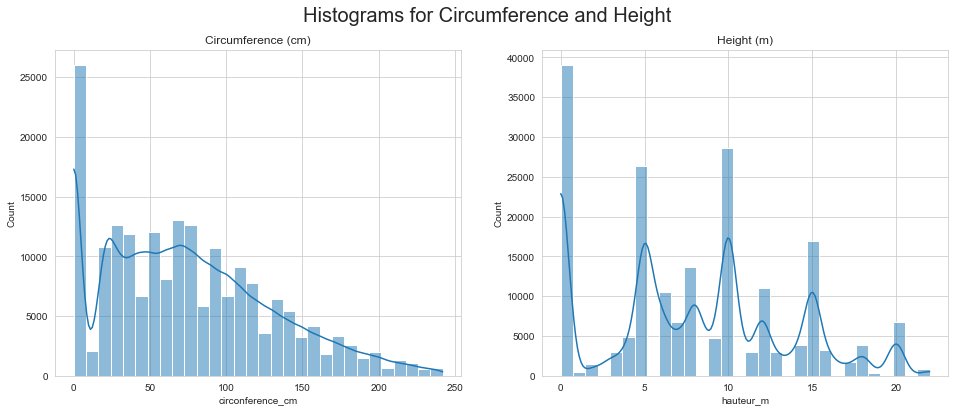

In [114]:
plt.figure(figsize=(16, 6)) # Set the size of the figure
plt.suptitle('Histograms for Circumference and Height', fontsize=20) # Set the title of the figure
plt.subplot(1, 2, 1) # Create the first subplot for the circumference
sns.histplot(df_cleaned['circonference_cm'], bins=30, kde=True) # Create a histogram for the circumference
plt.title('Circumference (cm)') # Set the title of the subplot
plt.subplot(1, 2, 2) # Create the second subplot for the height
sns.histplot(df_cleaned['hauteur_m'], bins=30, kde=True) # Create a histogram for the height
plt.title('Height (m)') # Set the title of the subplot
plt.show() # Display the figure so that it is visible in the notebook

## Correlation between circumference and height

### Calculate the correlation between the circumference and height of the trees

In [115]:
correlation = df_cleaned['circonference_cm'].corr(df_cleaned['hauteur_m']) # Calculate the correlation between the circumference and height
print(f'The correlation between the circumference and height of the trees is: {correlation:.2f}') # Display the correlation

The correlation between the circumference and height of the trees is: 0.77


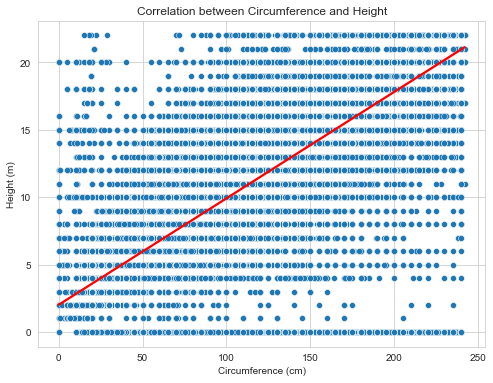

In [116]:
## Correlation between circumference and height
plt.figure(figsize=(8, 6)) # Set the size of the figure
sns.scatterplot(x='circonference_cm', y='hauteur_m', data=df_cleaned) # Create a scatter plot for the correlation between circumference and height
plt.title('Correlation between Circumference and Height') # Set the title of the figure
# Draw a line of best fit
sns.regplot(x='circonference_cm', y='hauteur_m', data=df_cleaned, scatter=False, color='red')
plt.xlabel('Circumference (cm)') # Set the label for the x-axis
plt.ylabel('Height (m)') # Set the label for the y-axis
plt.show() # Display the figure so that it is visible in the notebook

### Observations

- **Tree Circumference Distribution**: The distribution of tree circumferences shows that the majority of trees have a relatively small circumference, indicating a population of young or medium-sized trees. The presence of a few trees with a very large circumference also indicates the presence of older and more developed trees in the city.

- **Tree Height Distribution**: Similarly, the distribution of tree heights reveals that most trees in Paris have a moderate height. There is also a long tail in the distribution, showing that some trees reach remarkable heights, contributing to the diversity of the urban landscape.

- **Correlation Analysis**: The correlation between the circumference and height of the trees is quite strong (correlation of 0.77), suggesting that, generally, the wider a tree is, the taller it tends to be. This relationship demonstrates consistent growth patterns within the studied tree population.

These quantitative analyses provide insights into the structure and composition of the tree population in Paris, revealing a majority of young or medium-sized trees, while highlighting the presence of older and larger specimens, essential for biodiversity and the aesthetics of the city.


## Analysis bi-variate : correlation beetween circumference / height and stage of development 


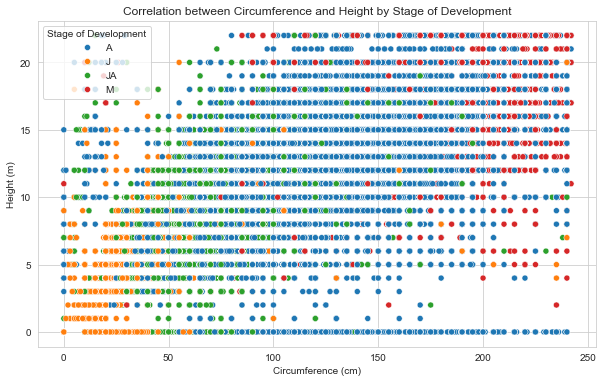

In [117]:
# Correlation between circumference and height based on the stage of development
plt.figure(figsize=(10, 6)) # Set the size of the figure
sns.scatterplot(x='circonference_cm', y='hauteur_m', hue='stade_developpement', data=df_cleaned) # Create a scatter plot for the correlation between circumference and height based on the stage of development
plt.title('Correlation between Circumference and Height by Stage of Development') # Set the title of the figure
plt.xlabel('Circumference (cm)') # Set the label for the x-axis
plt.ylabel('Height (m)') # Set the label for the y-axis
plt.legend(title='Stage of Development') # Add a legend with the title 'Stage of Development'
plt.show() # Display the figure so that it is visible in the notebook

## Distribution of Tree by arrondissement in scatter plot using geo_point_2d 

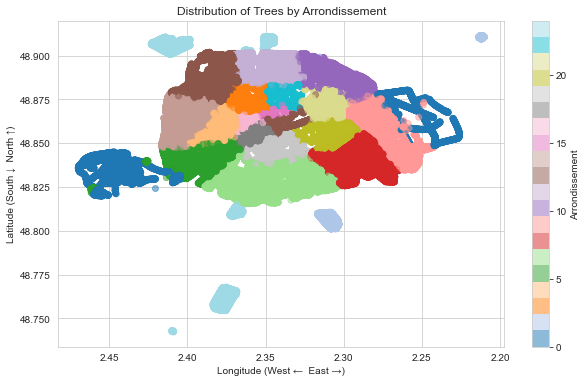

In [118]:
plt.figure(figsize=(10, 6))  # Set the size of the figure
# Assuming 'geo_point_2d_a' is latitude and 'geo_point_2d_b' is longitude
plt.scatter(df_cleaned['geo_point_2d_b'], df_cleaned['geo_point_2d_a'], 
            c=df_cleaned['arrondissement'].cat.codes, cmap='tab20', alpha=0.5)  # Scatter plot for longitude and latitude
plt.title('Distribution of Trees by Arrondissement')  # Title of the figure
plt.xlabel('Longitude (West ←  East →)')  # Label for the x-axis
plt.ylabel('Latitude (South ↓  North ↑)')  # Label for the y-axis
plt.colorbar(label='Arrondissement')  # Color bar with the label 'Arrondissement'
plt.gca().invert_xaxis()  # Invert the x-axis to show West on the left
plt.show()  # Display the figure


## Distribution of Tree Latitude and Longitude

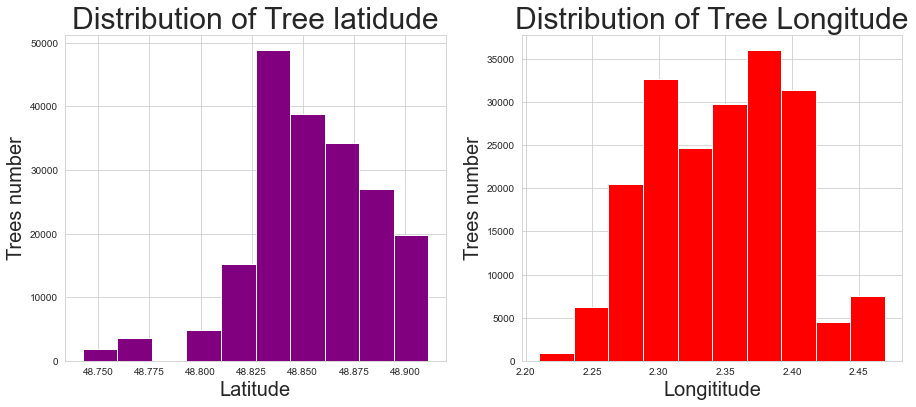

In [119]:
plt.figure(figsize=(15, 6)) # Set the size of the figure
plt.subplot(1, 2, 1) # Create the first subplot for the latitude
plt.hist(df_cleaned['geo_point_2d_a'], color='purple') # Create a histogram for the latitude
plt.xlabel("Latitude", fontsize=20) # Set the label for the x-axis
plt.ylabel("Trees number", fontsize=20) # Set the label for the y-axis
plt.title("Distribution of Tree latidude", fontsize=30) # Set the title of the subplot
plt.subplot(1, 2, 2) # Create the second subplot for the longitude
plt.hist(df_cleaned['geo_point_2d_b'], color='red') # Create a histogram for the longitude
plt.xlabel("Longititude", fontsize=20) # Set the label for the x-axis
plt.ylabel("Trees number", fontsize=20) # Set the label for the y-axis
plt.title("Distribution of Tree Longitude", fontsize=30) 
plt.show() # Display the figure so that it is visible in the notebook

### Observations
Based on the histograms, the geographical distribution of trees in Paris can be summarized as follows:

- **Latitude**: A significant number of trees are situated above the latitude of 48.825, which indicates a considerable presence of trees in the northern areas of Paris.

- **Longitude**: The density of trees peaks around the longitude of 2.35, which aligns with the central meridian of Paris. This central concentration may reflect the layout and planning of the city's green spaces.

This spatial analysis reveals a notable clustering of trees within central Paris, with an inclination towards the northern regions. The histograms help to visualize the urban forestry patterns and potentially guide future urban planning and green space development.


# b-Visualizations of quantitative variables

In [120]:
var_low_cardinality = ['remarquable', 'stade_developpement']
var_medium_cardinality = ['domanialite', 'arrondissement']
Var_high_cardinality = ['lieu', 'libelle_francais', 'genre', 'espece' ]

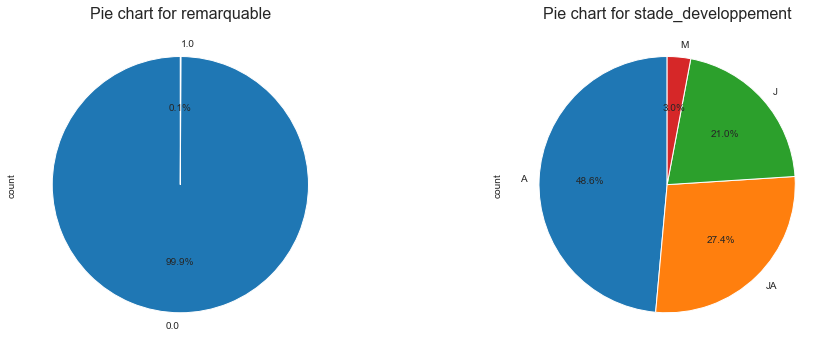

Number of remarkable trees: 78


In [121]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Create a figure and a set of subplots

for i, var in enumerate(var_low_cardinality): # Loop through each qualitative variable
    axes[i].set_title(f'Pie chart for {var}', fontsize=16)  # Set the title of each sub-graph
    df_cleaned[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[i])  # Create a pie chart for each variable

plt.tight_layout()  # Adjust the subplots to fit into the figure
plt.show() # Display the figure so that it is visible in the notebook
# Count the number of remarkable trees where the 'remarquable' column is 1.0 i.e. 'OUI'
remarkable_trees_count = df_cleaned[df_cleaned['remarquable'] == 1.0].shape[0]
print(f"Number of remarkable trees: {remarkable_trees_count}")



## Variables with few modalities. We will use a pie chart

## Variables with a medium number of modalities. We will use a bar chart

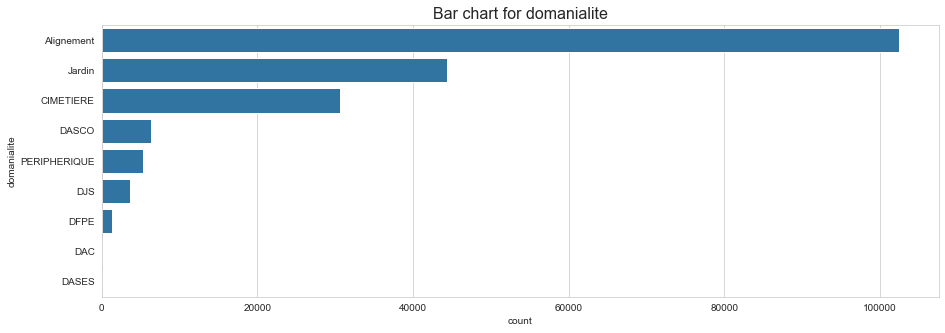

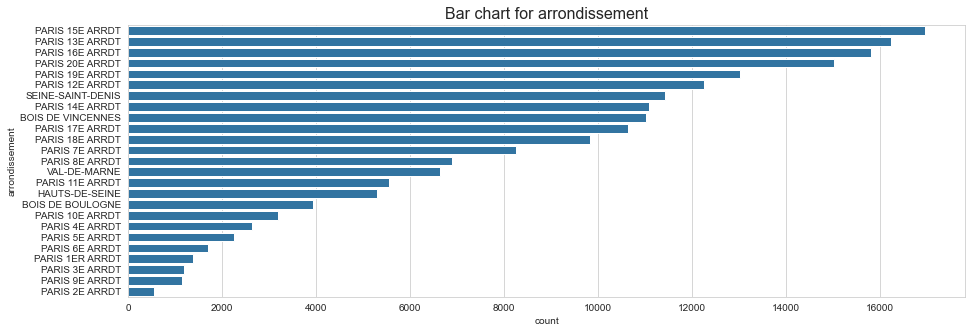

In [122]:
for var in var_medium_cardinality: # Loop through each qualitative variable
    plt.figure(figsize=(15, 5)) # Set the size of the figure
    sns.countplot(y=var, data=df_cleaned, order=df_cleaned[var].value_counts().index) # Create a countplot for each variable
    plt.title(f'Bar chart for {var}', fontsize=16) # Set the title of the figure
    plt.show() # Display the figure so that it is visible in the notebook


## Variables with a high number of modalities. We will use a bar chart

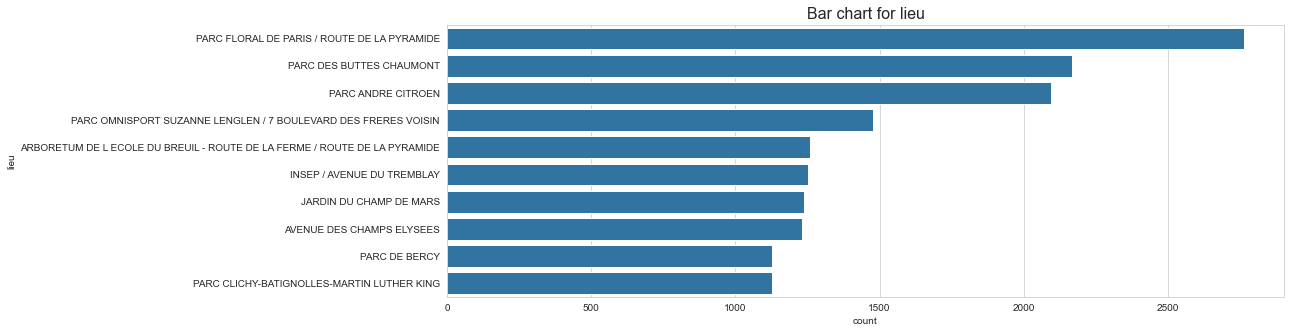

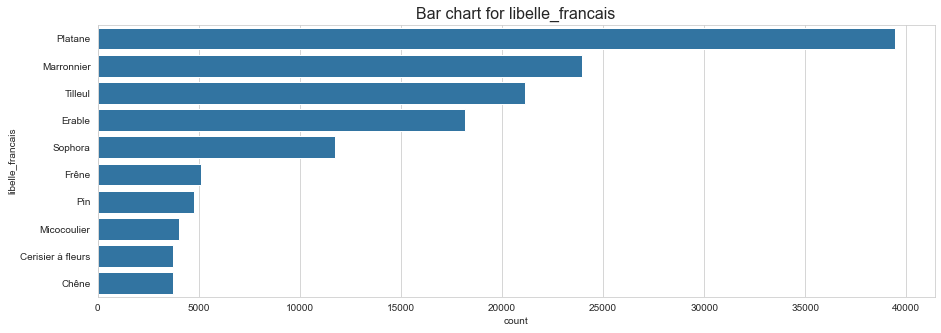

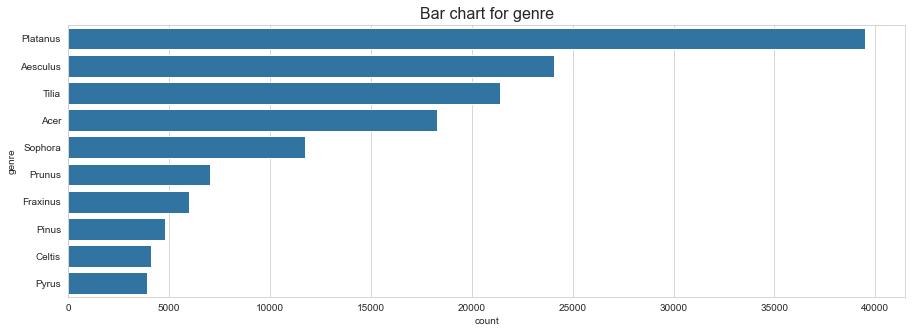

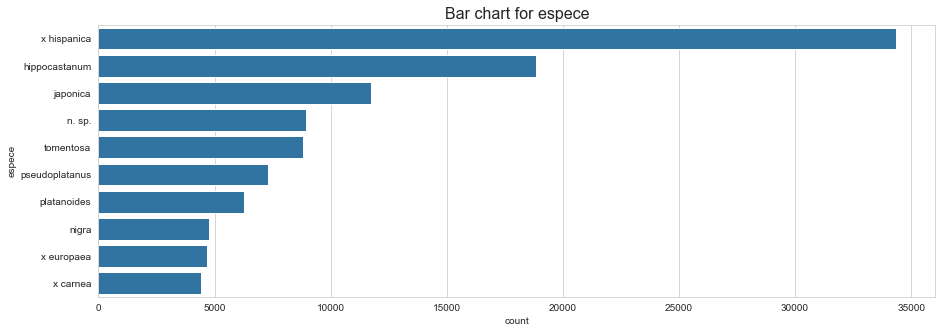

In [123]:
for var in Var_high_cardinality: # Loop through each qualitative variable
    plt.figure(figsize=(15, 5)) # Set the size of the figure
    sns.countplot(y=var, data=df_cleaned, order=df_cleaned[var].value_counts().index[:10]) # Create a countplot for each variable
    plt.title(f'Bar chart for {var}', fontsize=16) # Set the title of the figure
    plt.show() # Display the figure so that it is visible in the notebook

# Distibution of trees by arrondissement according to the stage of development with A = adult, J = young, M = mature, JA = young adult

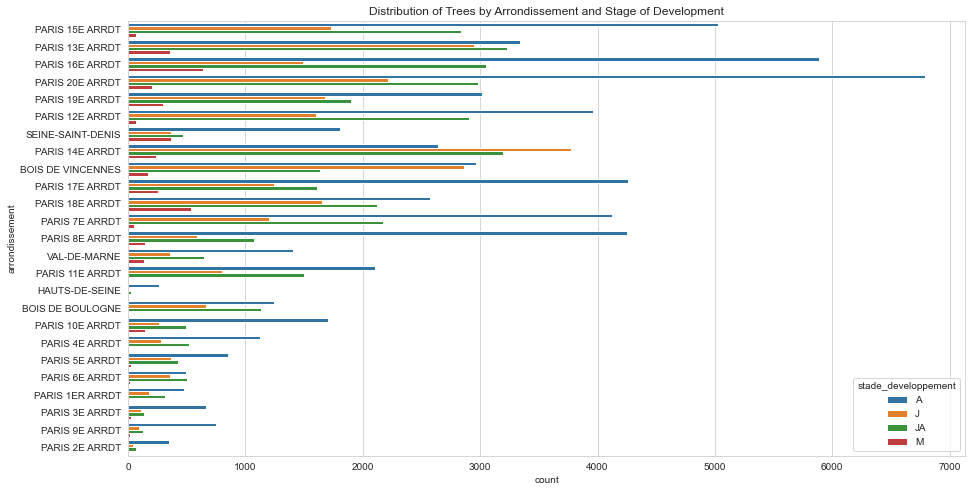

In [124]:
plt.figure(figsize=(15, 8)) # Set the size of the figure
sns.countplot(y='arrondissement', hue='stade_developpement', data=df_cleaned, order=df_cleaned['arrondissement'].value_counts().index) # Create a countplot for the distribution of trees by district and stage of development
plt.title('Distribution of Trees by Arrondissement and Stage of Development') # Set the title of the figure
plt.show() # Display the figure so that it is visible in the notebook

### Observations
Based on the bar chart depicting the distribution of trees by arrondissement and stage of development, we can derive the following insights:

- The **15th arrondissement (Paris 15E ARRDT)** has the largest total number of trees, indicating a dense urban forest. However, the representation of mature trees (M) is less pronounced when compared to other arrondissements.
- Arrondissements such as the **13th (Paris 13E ARRDT)**, **16th (Paris 16E ARRDT)**, and **18th (Paris 18E ARRDT)** exhibit a substantial number of mature trees, which signifies a well-established urban forest in these areas.
- There is a notable distribution of young (J) and young adult (JA) trees across all arrondissements, signifying ongoing planting initiatives and a commitment to the growth and development of Paris's urban greenery.
- The **20th arrondissement (Paris 20E ARRDT)** and others show a higher relative proportion of young and young adult trees, suggesting recent planting efforts or a focus on developing newer sections of the urban forest.
- Across all arrondissements, there is a notable number of adult trees (A), represented in blue on the chart, indicating a strong foundation of well-established trees within the city's urban forest.

The chart provides a snapshot of the age diversity of trees in Paris, illustrating the city's investment in a sustainable and resilient urban canopy. The varying stages of tree development across different districts reflect the strategic approach to urban planning and green space management within the city.



In [125]:
# Load the cleaned tree data from the CSV file
data_updated = pd.read_csv('../data/P2-arbres-fr_cleaned.csv')

# Total number of trees
total_trees = len(data_updated)

# Distribution by arrondissement
trees_by_district = data_updated['arrondissement'].value_counts()

# Domains
trees_by_domain = data_updated['domanialite'].value_counts()

# Most common species
common_species = data_updated['espece'].value_counts().head(3)

# Average and maximum circumference and height
average_circumference = data_updated['circonference_cm'].mean()
max_circumference = data_updated['circonference_cm'].max()
average_height = data_updated['hauteur_m'].mean()
max_height = data_updated['hauteur_m'].max()

# Remarkable trees where the 'remarquable' column is 1.0
remarkable_trees_count = data_updated[data_updated['remarquable'] == 1.0].shape[0]


In [126]:
# Display the results
print(f'Total number of trees in Paris: {total_trees}')
print('\nDistribution of trees by arrondissement:')
print(trees_by_district)
print('\nDistribution of trees by domain:')
print(trees_by_domain)
print('\nMost common species of trees:')
print(common_species)
print(f'\nAverage circumference of trees: {average_circumference:.2f} cm')
print(f'Maximum circumference of a tree: {max_circumference} cm')
print(f'Average height of trees: {average_height:.2f} m')
print(f'Maximum height of a tree: {max_height} m')
print(f'\nNumber of remarkable trees in Paris: {remarkable_trees_count}')


Total number of trees in Paris: 193997

Distribution of trees by arrondissement:
arrondissement
PARIS 15E ARRDT      16968
PARIS 13E ARRDT      16240
PARIS 16E ARRDT      15808
PARIS 20E ARRDT      15034
PARIS 19E ARRDT      13019
PARIS 12E ARRDT      12260
SEINE-SAINT-DENIS    11436
PARIS 14E ARRDT      11087
BOIS DE VINCENNES    11031
PARIS 17E ARRDT      10646
PARIS 18E ARRDT       9831
PARIS 7E ARRDT        8256
PARIS 8E ARRDT        6901
VAL-DE-MARNE          6649
PARIS 11E ARRDT       5557
HAUTS-DE-SEINE        5293
BOIS DE BOULOGNE      3946
PARIS 10E ARRDT       3195
PARIS 4E ARRDT        2641
PARIS 5E ARRDT        2251
PARIS 6E ARRDT        1695
PARIS 1ER ARRDT       1378
PARIS 3E ARRDT        1182
PARIS 9E ARRDT        1151
PARIS 2E ARRDT         542
Name: count, dtype: int64

Distribution of trees by domain:
domanialite
Alignement      102401
Jardin           44353
CIMETIERE        30609
DASCO             6369
PERIPHERIQUE      5297
DJS               3628
DFPE              1

# Conclusion
After analyzing the updated data on trees in Paris, here are the detailed conclusions:

- **Total Number of Trees**: The database contains a total of 193,997 trees.
- **Distribution by Arrondissement**: The districts with the largest number of trees are as follows:
  - Paris 15th Arrondissement: 16,968 trees
  - Paris 13th Arrondissement: 16,240 trees
  - Paris 16th Arrondissement: 15,808 trees
  This indicates an uneven distribution of trees across the city, which may reflect both the size of the districts and the presence of parks and green spaces.
- **Domains**: The majority of trees are located in alignments along streets, with 102,401 trees, and in gardens, with 44,353 trees. This suggests a significant urban greening policy in Paris, particularly for improving air quality and creating accessible green spaces for the public.
- **Most Common Species**: The most common species are *x hispanica* with 34,329 trees, *hippocastanum* with 18,851 trees, and *japonica* with 11,747 trees, demonstrating a diversity of species adapted to the urban environment.
- **Circumference and Height**: The average circumference of the trees is 74.80 cm, with the largest tree having a circumference of 242 cm. The average height of the trees is 7.93 m, with the tallest tree reaching 22 m. These statistics show a variety of development stages and types of trees present in the city.
- **Remarkable Trees**: There are only 78 trees classified as remarkable in the database, which may indicate a need for reassessment in tree classification or conservation efforts.

**Conclusion**: The statistical analysis reveals an urban arboriculture management strategy in Paris that favors species diversity and the distribution of green spaces throughout the city. However, the variability in the concentration of trees by district and the differences in terms of circumference and height underline the challenges and opportunities for balanced and inclusive urban planning. The significant presence of trees in alignment also emphasizes the city's efforts to integrate greenery into the urban landscape, thus improving the quality of life for city dwellers.
